In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

In [2]:
## Per min / per game ranks are missing some players due them not being in ESPN top 150


data = pd.read_csv("data/fantasy_rank_data.csv")
print(data.columns)
data=data.rename(columns = {'Number': 'ESPN_Rank', 'Name':'Player'})
data['Sum_Zscore'] = (data['Zscore_Fpoints_avg_G'] + data['Zscore_Fpoints_avg_min'])/2
data['Base_Rank'] = data['Sum_Zscore'].rank(ascending = False)
data.sort_values(by ='Base_Rank', ascending = True).head(50)[['Player', 'ESPN_Rank', 'Base_Rank', 'Fpoints_permin_rank', 'Fpoints_pergame_rank']]

Index(['Number', 'Name', 'Team', 'Primary_Position', 'Secondary_Position',
       'Fpoints_avg_G', 'Fpoints_avg_min', 'Fpoints_pergame_rank',
       'Fpoints_permin_rank', 'Zscore_Fpoints_avg_G',
       'Zscore_Fpoints_avg_min'],
      dtype='object')


,Player,ESPN_Rank,Base_Rank,Fpoints_permin_rank,Fpoints_pergame_rank
7,Joel Embiid,8,1.0,4.0,3.0
0,Nikola Jokic,1,2.0,5.0,2.0
1,Luka Doncic,2,3.0,7.0,1.0
4,Giannis Antetokounmpo,5,4.0,10.0,4.0
2,Shai Gilgeous-Alexander,3,5.0,8.0,5.0
3,Victor Wembanyama,4,6.0,6.0,8.0
10,Anthony Davis,11,7.0,14.0,6.0
6,Tyrese Haliburton,7,8.0,13.0,9.0
14,LeBron James,15,9.0,15.0,7.0
5,Domantas Sabonis,6,10.0,18.0,10.0


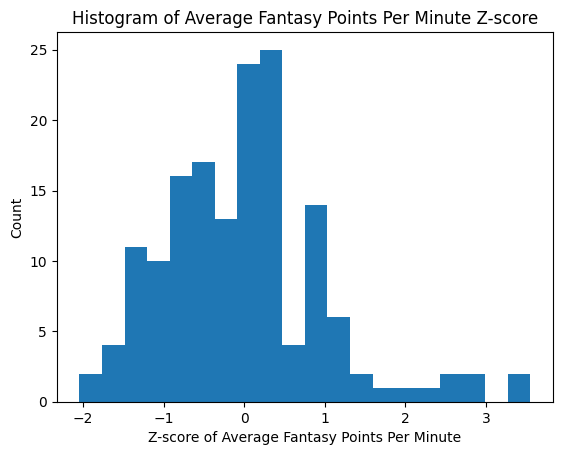

In [3]:
plt.hist(data['Zscore_Fpoints_avg_min'], bins = 20)
plt.xlabel("Z-score of Average Fantasy Points Per Minute")
plt.ylabel("Count")
plt.title("Histogram of Average Fantasy Points Per Minute Z-score")
plt.savefig("plots/fppmz_hist.png")

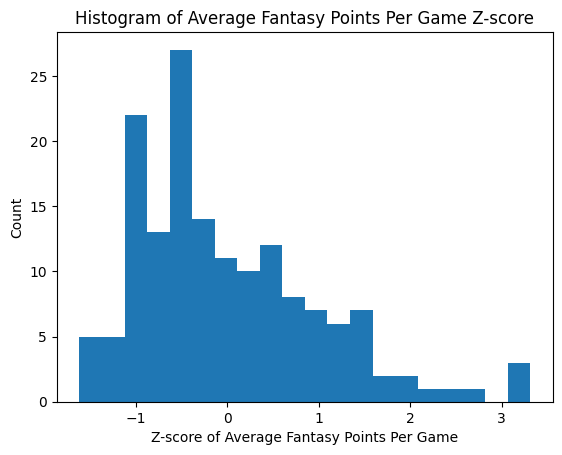

In [4]:
plt.hist(data['Zscore_Fpoints_avg_G'], bins = 20)
plt.xlabel("Z-score of Average Fantasy Points Per Game")
plt.ylabel("Count")
plt.title("Histogram of Average Fantasy Points Per Game Z-score")
plt.savefig("plots/fppgz_hist.png")

In [5]:
# Using ESPN minutes and games played projections:

min1dat = """
Player,GP,MIN
Nikola Jokic,77,35.1
Luka Doncic,72,37.0
Shai Gilgeous-Alexander,74,34.8
Victor Wembanyama,70,33.4
Giannis Antetokounmpo,70,35.4
Domantas Sabonis,80,36.1
Tyrese Haliburton,70,34.8
Joel Embiid,60,34.4
Jayson Tatum,76,36.0
Anthony Edwards,78,36.8
Anthony Davis,64,35.9
Jalen Brunson,76,35.8
Ja Morant,70,36.2
Donovan Mitchell,70,36.1
LeBron James,65,35.2
Trae Young,70,36.2
De'Aaron Fox,72,36.2
Devin Booker,70,36.6
Scottie Barnes,70,36.3
Pascal Siakam,78,34.3
Kevin Durant,66,36.5
Karl-Anthony Towns,70,34.9
Tyrese Maxey,72,36.6
Damian Lillard,70,35.6
Alperen Sengun,72,33.7
James Harden,72,34.7
LaMelo Ball,66,34.3
Cade Cunningham,70,34.9
DeMar DeRozan,77,33.6
Paolo Banchero,76,35.9
Nikola Vucevic,78,34.1
Chet Holmgren,72,31.1
Dejounte Murray,76,33.6
Bam Adebayo,72,34.9
Jalen Green,79,34.0
Kyrie Irving,64,34.5
Stephen Curry,72,32.4
Zion Williamson,64,33.7
Jaylen Brown,74,34.0
Desmond Bane,69,34.9
Lauri Markkanen,70,34.1
Jalen Williams,72,33.2
Kawhi Leonard,64,33.3
Jamal Murray,69,32.3
Coby White,79,36.7
Rudy Gobert,74,33.2
Mikal Bridges,82,35.1
Miles Bridges,74,36.8
Julius Randle,69,35.8
D'Angelo Russell,75,33.4
"""

min1 = pd.read_csv(StringIO(min1dat))


min2 = pd.read_csv("data/min_proj_50-100.csv")
import pandas as pd
from io import StringIO

min3dat = """
Rank,Player,GP,MIN
101,Jakob Poeltl,68,27.4
102,Jaime Jaquez Jr.,74,32.0
103,Jonathan Kuminga,74,29.6
104,Malcolm Brogdon,65,31.9
105,Aaron Gordon,74,31.2
106,Deni Avdija,75,29.7
107,Naz Reid,78,25.7
108,Dennis Schroder,78,31.3
109,Jabari Smith Jr.,77,32.7
110,P.J. Washington,74,33.3
111,Tyus Jones,70,27.3
112,Donte DiVincenzo,75,30.2
113,Reed Sheppard,70,28.6
114,Walker Kessler,70,24.5
115,Caris LeVert,72,29.3
116,Mike Conley,74,27.2
117,Jaden Ivey,76,31.8
118,John Collins,70,28.2
119,Jordan Poole,78,27.8
120,Khris Middleton,62,29.0
121,Jerami Grant,68,33.5
122,Brandin Podziemski,75,29.3
123,Deandre Ayton,64,28.8
124,Ausar Thompson,73,29.5
125,Zach Edey,70,25.9
126,Draymond Green,68,27.5
127,Stephon Castle,70,28.9
128,Ayo Dosunmu,77,31.3
129,OG Anunoby,66,33.6
130,Malik Monk,73,25.1
131,Ivica Zubac,71,26.7
132,Keldon Johnson,70,29.8
133,Donovan Clingan,70,22.8
134,Kelly Oubre Jr.,70,30.8
135,Herbert Jones,74,30.3
136,Dereck Lively II,70,25.8
137,Kelly Olynyk,75,23.0
138,Cameron Johnson,68,30.5
139,Scoot Henderson,70,31.8
140,Jeremy Sochan,71,31.9
141,Trey Murphy III,70,28.5
142,Andre Drummond,76,19.5
143,Max Strus,74,31.1
144,Onyeka Okongwu,69,25.8
145,Chris Paul,64,25.7
146,Tre Jones,76,23.8
147,Shaedon Sharpe,69,34.4
148,Jalen Suggs,70,27.4
149,Jordan Clarkson,68,30.9
150,Harrison Barnes,81,30.7
"""

min3 = pd.read_csv(StringIO(min3dat))



min_full = pd.concat([min1, min2, min3])
min_full

,Player,GP,MIN,Rank
0,Nikola Jokic,77,35.1,NaN
1,Luka Doncic,72,37.0,NaN
2,Shai Gilgeous-Alexander,74,34.8,NaN
3,Victor Wembanyama,70,33.4,NaN
4,Giannis Antetokounmpo,70,35.4,NaN
...,...,...,...,...
45,Tre Jones,76,23.8,146.0
46,Shaedon Sharpe,69,34.4,147.0
47,Jalen Suggs,70,27.4,148.0
48,Jordan Clarkson,68,30.9,149.0


In [7]:
data_min = data.merge(min_full, on = 'Player')
data_min.drop(columns = ['Rank'], inplace=True)
data_min['Tot_fpoints'] = data_min['Fpoints_avg_min'] *data_min['MIN'] * data_min['GP']
data_min['proj_rank'] = data_min['Tot_fpoints'].rank(ascending = False)
data_min_spec = data_min.sort_values(by = 'proj_rank')[['Player', 'ESPN_Rank', 'Base_Rank', 'proj_rank','Fpoints_permin_rank', 'Fpoints_pergame_rank',
                                      'Tot_fpoints']].drop_duplicates()

data_min_spec.tail(40)
ranks = data_min_spec[['Player', 'ESPN_Rank', 'proj_rank', 'Tot_fpoints']]
ranks
ranks.to_csv("data/ranks_no_progression.csv")

In [8]:
data_min_spec['rank_diff'] = data_min['proj_rank']-data_min['ESPN_Rank']

data_min_spec.sort_values(by = 'rank_diff', ascending = True).head(50)

,Player,ESPN_Rank,Base_Rank,proj_rank,Fpoints_permin_rank,Fpoints_pergame_rank,Tot_fpoints,rank_diff
111,Donte DiVincenzo,112,101.0,79.0,156.0,100.0,2366.185567,-33.0
59,Jarrett Allen,60,41.0,41.0,69.0,48.0,2851.490536,-19.0
108,Jabari Smith Jr.,109,130.0,91.0,266.0,114.5,2289.000000,-18.0
125,Draymond Green,126,74.0,110.0,111.0,90.0,2139.114391,-16.0
83,Tobias Harris,84,78.0,68.0,172.0,65.5,2465.650592,-16.0
63,Evan Mobley,64,38.0,48.0,47.0,45.0,2730.666667,-16.0
145,Trey Murphy III,141,113.5,125.5,183.0,103.0,2008.479730,-15.5
43,Jamal Murray,44,23.0,29.0,29.0,29.0,2992.825714,-15.0
105,Deni Avdija,106,102.0,92.0,173.0,93.0,2286.702658,-14.0
127,Ayo Dosunmu,128,146.0,114.0,300.0,146.0,2103.661168,-14.0


In [9]:
# Replacing team labels for recent trade (KAT / Randle / Divincenzo)
data_min['Team'] = data_min['Team'].replace('NY*', 'NY')
data_min['Team'] = data_min['Team'].replace('MIN*', 'MIN')

In [10]:
## Determining Increase / Decrease Factor by team: 

team_adj = {
    'BOS'

SyntaxError: incomplete input (3282743691.py, line 4)